In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import create_new_dataset
import numpy as np
%load_ext autoreload
%autoreload 2

path = "Final/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create the new data

In [31]:

datasets = ['MNIST', 'CIFAR10', 'CIFAR100']
optimizers = ['SGD', 'Adam', 'SCRN', 'SCRN_Momentum']

for dataset in datasets:
    for optimizer in optimizers:
        create_new_dataset(dataset, optimizer)

Reading MNIST SGD...
MNIST SGD.csv created

Reading MNIST Adam...
MNIST Adam.csv created

Reading MNIST SCRN...
MNIST SCRN.csv created

Reading MNIST SCRN_Momentum...
MNIST SCRN_Momentum.csv created

Reading CIFAR10 SGD...
CIFAR10 SGD.csv created

Reading CIFAR10 Adam...
CIFAR10 Adam.csv created

Reading CIFAR10 SCRN...
CIFAR10 SCRN.csv created

Reading CIFAR10 SCRN_Momentum...
CIFAR10 SCRN_Momentum.csv created

Reading CIFAR100 SGD...
CIFAR100 SGD.csv created

Reading CIFAR100 Adam...
CIFAR100 Adam.csv created

Reading CIFAR100 SCRN...
CIFAR100 SCRN.csv created

Reading CIFAR100 SCRN_Momentum...
CIFAR100 SCRN_Momentum.csv created



In [66]:
def load_info(dataset):

    optimizers = ['SGD', 'Adam', 'SCRN', 'SCRN_Momentum']
    load = [f"{dataset}_{optimizer}.csv" for optimizer in optimizers]

    #into a dataframe adding a column with the optimizer name
    df = pd.DataFrame()
    for file in load:
        df_temp = pd.read_csv(path + file)
        #consider the case of scrn_momentum
        if 'Momentum' in file:
            df_temp['optimizer'] = 'SCRN_Momentum'
        else:
            df_temp['optimizer'] = file.split('_')[1].split('.')[0]
        df = pd.concat([df, df_temp])

    df['difference'] = df['val_loss'] - df['train_loss']
    #now calculate the std with the std of the val loss and train loss
    df['difference_std'] = (np.sqrt(df['std_val_loss']**2 + df['std_train_loss']**2))

    losses = df.describe()[['train_loss', 'val_loss']]
    min_loss = losses.loc['min'].min()
    max_loss = losses.loc['max'].max()
    min_acc = df.describe()[['train_acc', 'val_acc']].loc['min'].min()
    max_acc = df.describe()[['train_acc', 'val_acc']].loc['max'].max()
    
    return df, min_loss, max_loss, min_acc, max_acc



# Set the style and increase the font scale globally
def create_comparative_plot(df, metric, min_metric, max_metric):

    sns.set_style("darkgrid")
    sns.set_context("paper", font_scale=1.5)  # Increase font scale

    # Create a figure and a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

    # Plotting without creating legends in subplots
    for optimizer in df['optimizer'].unique():
        subset = df[df['optimizer'] == optimizer]
        
        # Plot Training Loss
        axes[0].plot(subset['epoch'], subset[f'train_{metric}'], label=optimizer)
        axes[0].fill_between(subset['epoch'], subset[f'train_{metric}'] - subset[f'std_train_{metric}'], subset[f'train_{metric}'] + subset[f'std_train_{metric}'], alpha=0.4)

        # Plot Validation Loss
        axes[1].plot(subset['epoch'], subset[f'val_{metric}'], label=optimizer)
        axes[1].fill_between(subset['epoch'], subset[f'val_{metric}'] - subset[f'std_val_{metric}'], subset[f'val_{metric}'] + subset[f'std_val_{metric}'], alpha=0.4)

    # Set titles, labels, and tick parameters for Training Loss subplot
    axes[0].set_title(f"Training {metric} {dataset}", fontsize=16)
    axes[0].set_ylim(min_metric, max_metric)

    axes[0].set_xlabel("Epoch", fontsize=12)
    axes[0].set_ylabel("Loss", fontsize=12)

    # Set titles, labels, and tick parameters for Validation Loss subplot
    axes[1].set_title(f"Validation {metric} {dataset}", fontsize=16)
    axes[1].set_ylim(min_metric, max_metric)

    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].set_ylabel("Loss", fontsize=14)

    # Apply tick parameters to both subplots
    for ax in axes:
        ax.tick_params(axis='both', labelsize=14)

    # Create a single legend for the figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(handles), fontsize=12)


    # Adjust layout to accommodate the figure-wide legend
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()

def plot_loss_difference(df):
    # Set style and context
    sns.set_style("darkgrid")
    sns.set_context("paper")
    plt.figure(figsize=(10, 5))

    # Plotting lineplot
    sns.lineplot(x="epoch", y="difference", hue="optimizer", data=df)

    # Adding fill_between for each optimizer
    optimizers = df['optimizer'].unique()
    for optimizer in optimizers:
        subset = df[df['optimizer'] == optimizer]
        plt.fill_between(subset['epoch'], 
                        subset['difference'] - subset['difference_std'], 
                        subset['difference'] + subset['difference_std'], 
                        alpha=0.3)

    # Adding titles and labels
    plt.title(f"Validation - Training Loss Difference / {dataset}", fontsize=16)
    plt.xlabel("Epoch", fontsize=13)
    plt.ylabel("Difference", fontsize=13)

    # Horizontal line at y=0
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)


    plt.show()


# Analyze the data

In [72]:
dataset = 'CIFAR100'
df, min_loss, max_loss, min_acc, max_acc = load_info(dataset)
df

,train_acc,val_acc,val_loss,std_train_acc,std_val_acc,std_val_loss,epoch,train_loss,std_train_loss,optimizer,difference,difference_std
0,0.009813,0.00952,4.605319,0.000486,0.001553,0.000133,0,4.605267,0.000006,SGD,0.000053,0.000133
1,0.141698,0.19052,4.306063,0.003972,0.010350,0.004409,1,4.369354,0.002317,SGD,-0.063291,0.004981
2,0.239840,0.23596,4.263171,0.004625,0.012834,0.006176,2,4.264041,0.003419,SGD,-0.000870,0.007059
3,0.296729,0.26944,4.231354,0.007421,0.004394,0.003415,3,4.213566,0.003249,SGD,0.017788,0.004714
4,0.339080,0.28512,4.213038,0.005485,0.005859,0.004559,4,4.174845,0.003511,SGD,0.038193,0.005754
...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.362409,0.32008,3.933000,0.006058,0.003068,0.004333,25,3.824036,0.004826,SCRN_Momentum,0.108964,0.006486
26,0.369458,0.32796,3.933099,0.005436,0.008864,0.005327,26,3.819701,0.004459,SCRN_Momentum,0.113398,0.006947
27,0.375280,0.33180,3.930829,0.007996,0.007089,0.004613,27,3.814700,0.005249,SCRN_Momentum,0.116128,0.006988
28,0.381733,0.33168,3.930273,0.005440,0.011711,0.007765,28,3.810170,0.004034,SCRN_Momentum,0.120102,0.008750


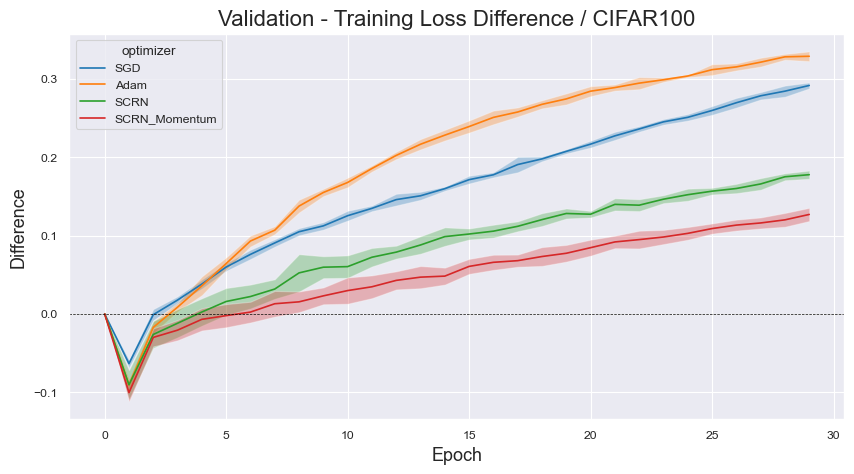

In [73]:
plot_loss_difference(df)

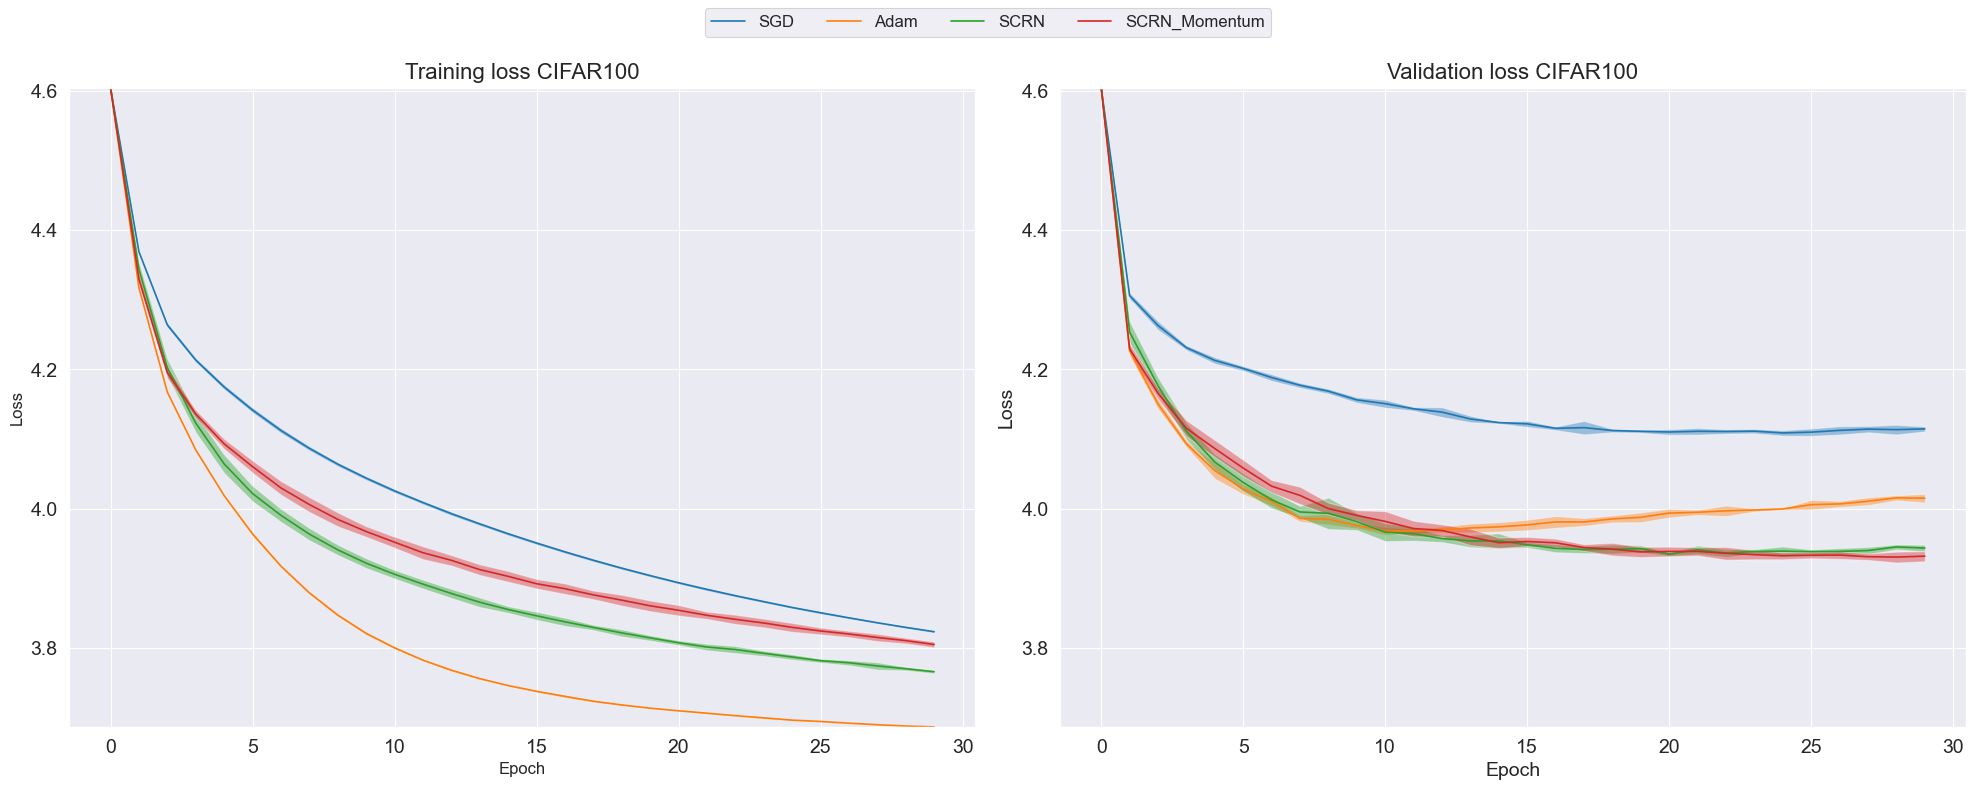

In [74]:
create_comparative_plot(df, 'loss', min_loss, max_loss)


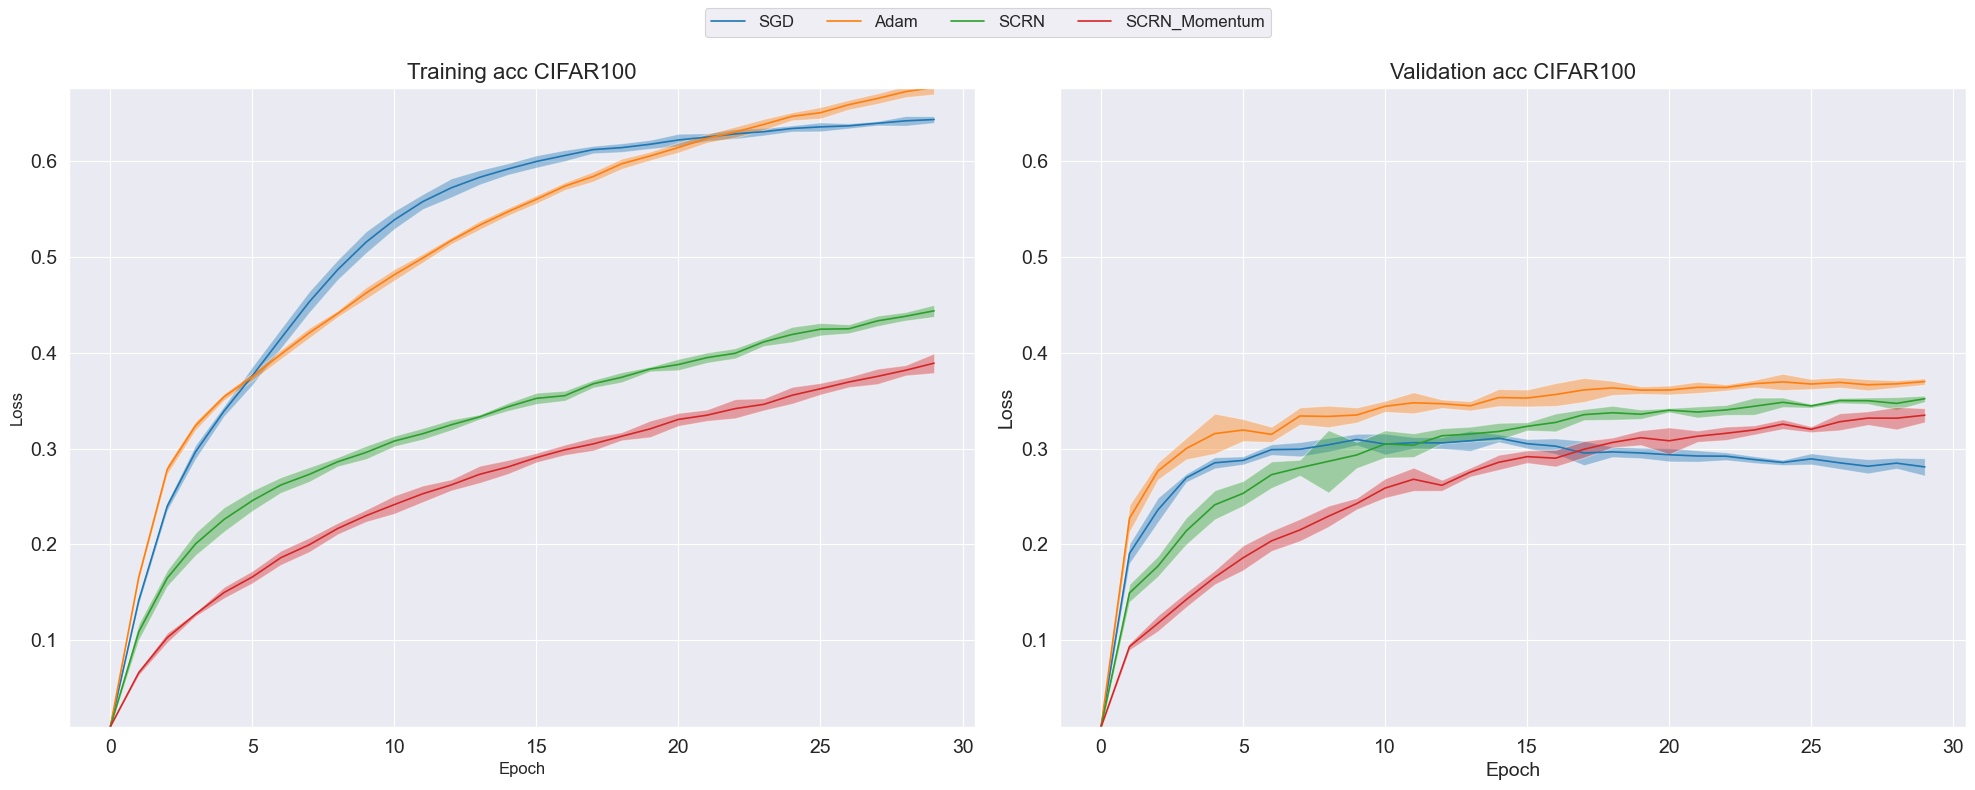

In [75]:
create_comparative_plot(df, 'acc', min_acc, max_acc)
